In [1]:
import os

from collections import defaultdict

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from Standard_functions import get_user_split_data, plot_fit_score_pred,fit_score_pred_G_NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, f1_score
import copy

import warnings

warnings.filterwarnings('always') 

In [2]:
os.chdir('../Data/')

# No categorical feature handling

In [3]:
df = pd.read_pickle('full_features')
df.drop('max_order_number',inplace=True,axis=1)

In [4]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df, val_size=.2, seed=42)
print('Gaussian Naive Bayes:')
fit_score_pred_G_NB(X_tr, X_val, y_tr, y_val)

Gaussian Naive Bayes:
Our f1-score is 0.39999024929307375
And we've predicted 1493783 non-re-orders and 201951 re-orders.


## ROC AUC

In [5]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [6]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [7]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

ROC AUC score =  0.7958724861292538


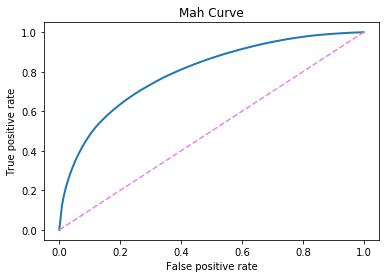

In [8]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Mah Curve');
print("ROC AUC score = ", roc_auc_score(y_val, probabilities))

## Messing with thresholds

In [9]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)

In [10]:
clf = GaussianNB(var_smoothing=1e-9)
clf.fit(X_tr, y_tr)
probabilities = clf.predict_proba(X_val)[:,1]


In [11]:
roc_auc_score(y_val,probabilities)

0.7958724861292538

In [12]:
fpr, tpr, thresholds = roc_curve(y_val,probabilities)

In [13]:
probs = pd.DataFrame(probabilities)
probs.columns = ['score']
test = copy.deepcopy(probs)

In [14]:
threshold = np.linspace(.1,.9,40)
dict_thresholdf1 = dict()

for i in threshold:
    test = copy.deepcopy(probs)
    conditions = [
    (test.score > i),
    (test.score < i)
    ]
    choices = [1,0]
    test.score = np.select(conditions, choices)
    dict_thresholdf1[i] = f1_score(y_val,test)

dict_thresholdf1

{0.1: 0.39651259627061497,
 0.12051282051282051: 0.3982961136723732,
 0.14102564102564102: 0.3995977551534677,
 0.16153846153846155: 0.4001599739443636,
 0.18205128205128207: 0.4004352927173488,
 0.20256410256410257: 0.4007314537397293,
 0.2230769230769231: 0.4008961904454374,
 0.24358974358974358: 0.401061244755841,
 0.2641025641025641: 0.40106927528021685,
 0.2846153846153846: 0.40104179939755047,
 0.30512820512820515: 0.40106693776538666,
 0.32564102564102565: 0.4012232068077715,
 0.34615384615384615: 0.40109562815233707,
 0.3666666666666667: 0.4008468078536457,
 0.38717948717948714: 0.4006411690543809,
 0.4076923076923077: 0.4005452476112332,
 0.42820512820512824: 0.4005269110504956,
 0.4487179487179487: 0.4004119574667291,
 0.46923076923076923: 0.40020757598571705,
 0.4897435897435898: 0.39996325555759693,
 0.5102564102564102: 0.3997817121478276,
 0.5307692307692308: 0.3997511955979081,
 0.5512820512820513: 0.39948798351021847,
 0.5717948717948718: 0.3994271944922548,
 0.592307692